## CABra (Brazil)

In [1]:
from ai4water.eda import EDA
from ai4water.datasets import CABra
from ai4water.utils.utils import get_version_info

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from easy_mpl import hist, ridge
from easy_mpl import scatter
from easy_mpl.utils import process_cbar


**********Tensorflow models could not be imported **********



C:\Users\ather\.conda\envs\cat_aware\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
for k,v in get_version_info().items():
    print(k, v)

python 3.8.17 (default, Jul  5 2023, 20:44:21) [MSC v.1916 64 bit (AMD64)]
os nt
ai4water 1.07
easy_mpl 0.21.3
SeqMetrics 1.3.4
numpy 1.24.3
pandas 1.3.4
matplotlib 3.6.0
sklearn 1.3.0
xarray 0.20.1
netCDF4 1.5.7
seaborn 0.12.2


In [3]:
dataset = CABra(
    path=r"E:\data\gscad\CAMELS\CABra"   # set path to None if you have not already downloaded data
)



    Not downloading the data since the directory 
    E:\data\gscad\CAMELS\CABra already exists.
    Use overwrite=True to remove previously saved files and download again


In [4]:
dataset.start

Timestamp('1980-10-02 00:00:00')

In [5]:
dataset.end

Timestamp('2010-09-30 00:00:00')

In [6]:
stations = dataset.stations()
len(stations)

735

### Static Data

In [7]:
dataset.static_features

['ANA_ID',
 'clim_p',
 'clim_tmin',
 'clim_tmax',
 'clim_rh',
 'clim_wind',
 'clim_srad',
 'clim_et',
 'clim_pet',
 'aridity_index',
 'p_seasonality',
 'clim_quality',
 'ANA_ID',
 'longitude',
 'latitude',
 'gauge_hreg',
 'gauge_biome',
 'gauge_state',
 'missing_data',
 'series_length',
 'quality_index',
 'ANA_ID',
 'catch_lith',
 'sub_porosity',
 'sub_permeability',
 'sub_hconduc',
 'ANA_ID',
 'aquif_name',
 'aquif_type',
 'catch_wtd',
 'catch_hand',
 'hand_class',
 'well_number',
 'well_static',
 'well_dynamic',
 'ANA_ID',
 'dist_urban',
 'cover_urban',
 'cover_crops',
 'res_number',
 'res_area',
 'res_volume',
 'res_regulation',
 'water_demand',
 'hdisturb_index',
 'ANA_ID',
 'cover_main',
 'cover_bare',
 'cover_forest',
 'cover_crops',
 'cover_grass',
 'cover_moss',
 'cover_shrub',
 'cover_urban',
 'cover_snow',
 'cover_waterp',
 'cover_waters',
 'ndvi_djf',
 'ndvi_mam',
 'ndvi_jja',
 'ndvi_son',
 'ANA_ID',
 'soil_type',
 'soil_textclass',
 'soil_sand',
 'soil_silt',
 'soil_clay',


In [9]:
q = ''
lc01 = ''
nvis = ''
anngro = ''
gromega = ''
npp = ''

In [8]:
static = dataset.fetch_static_features(stn_id=stations)
static.shape

(735, 97)

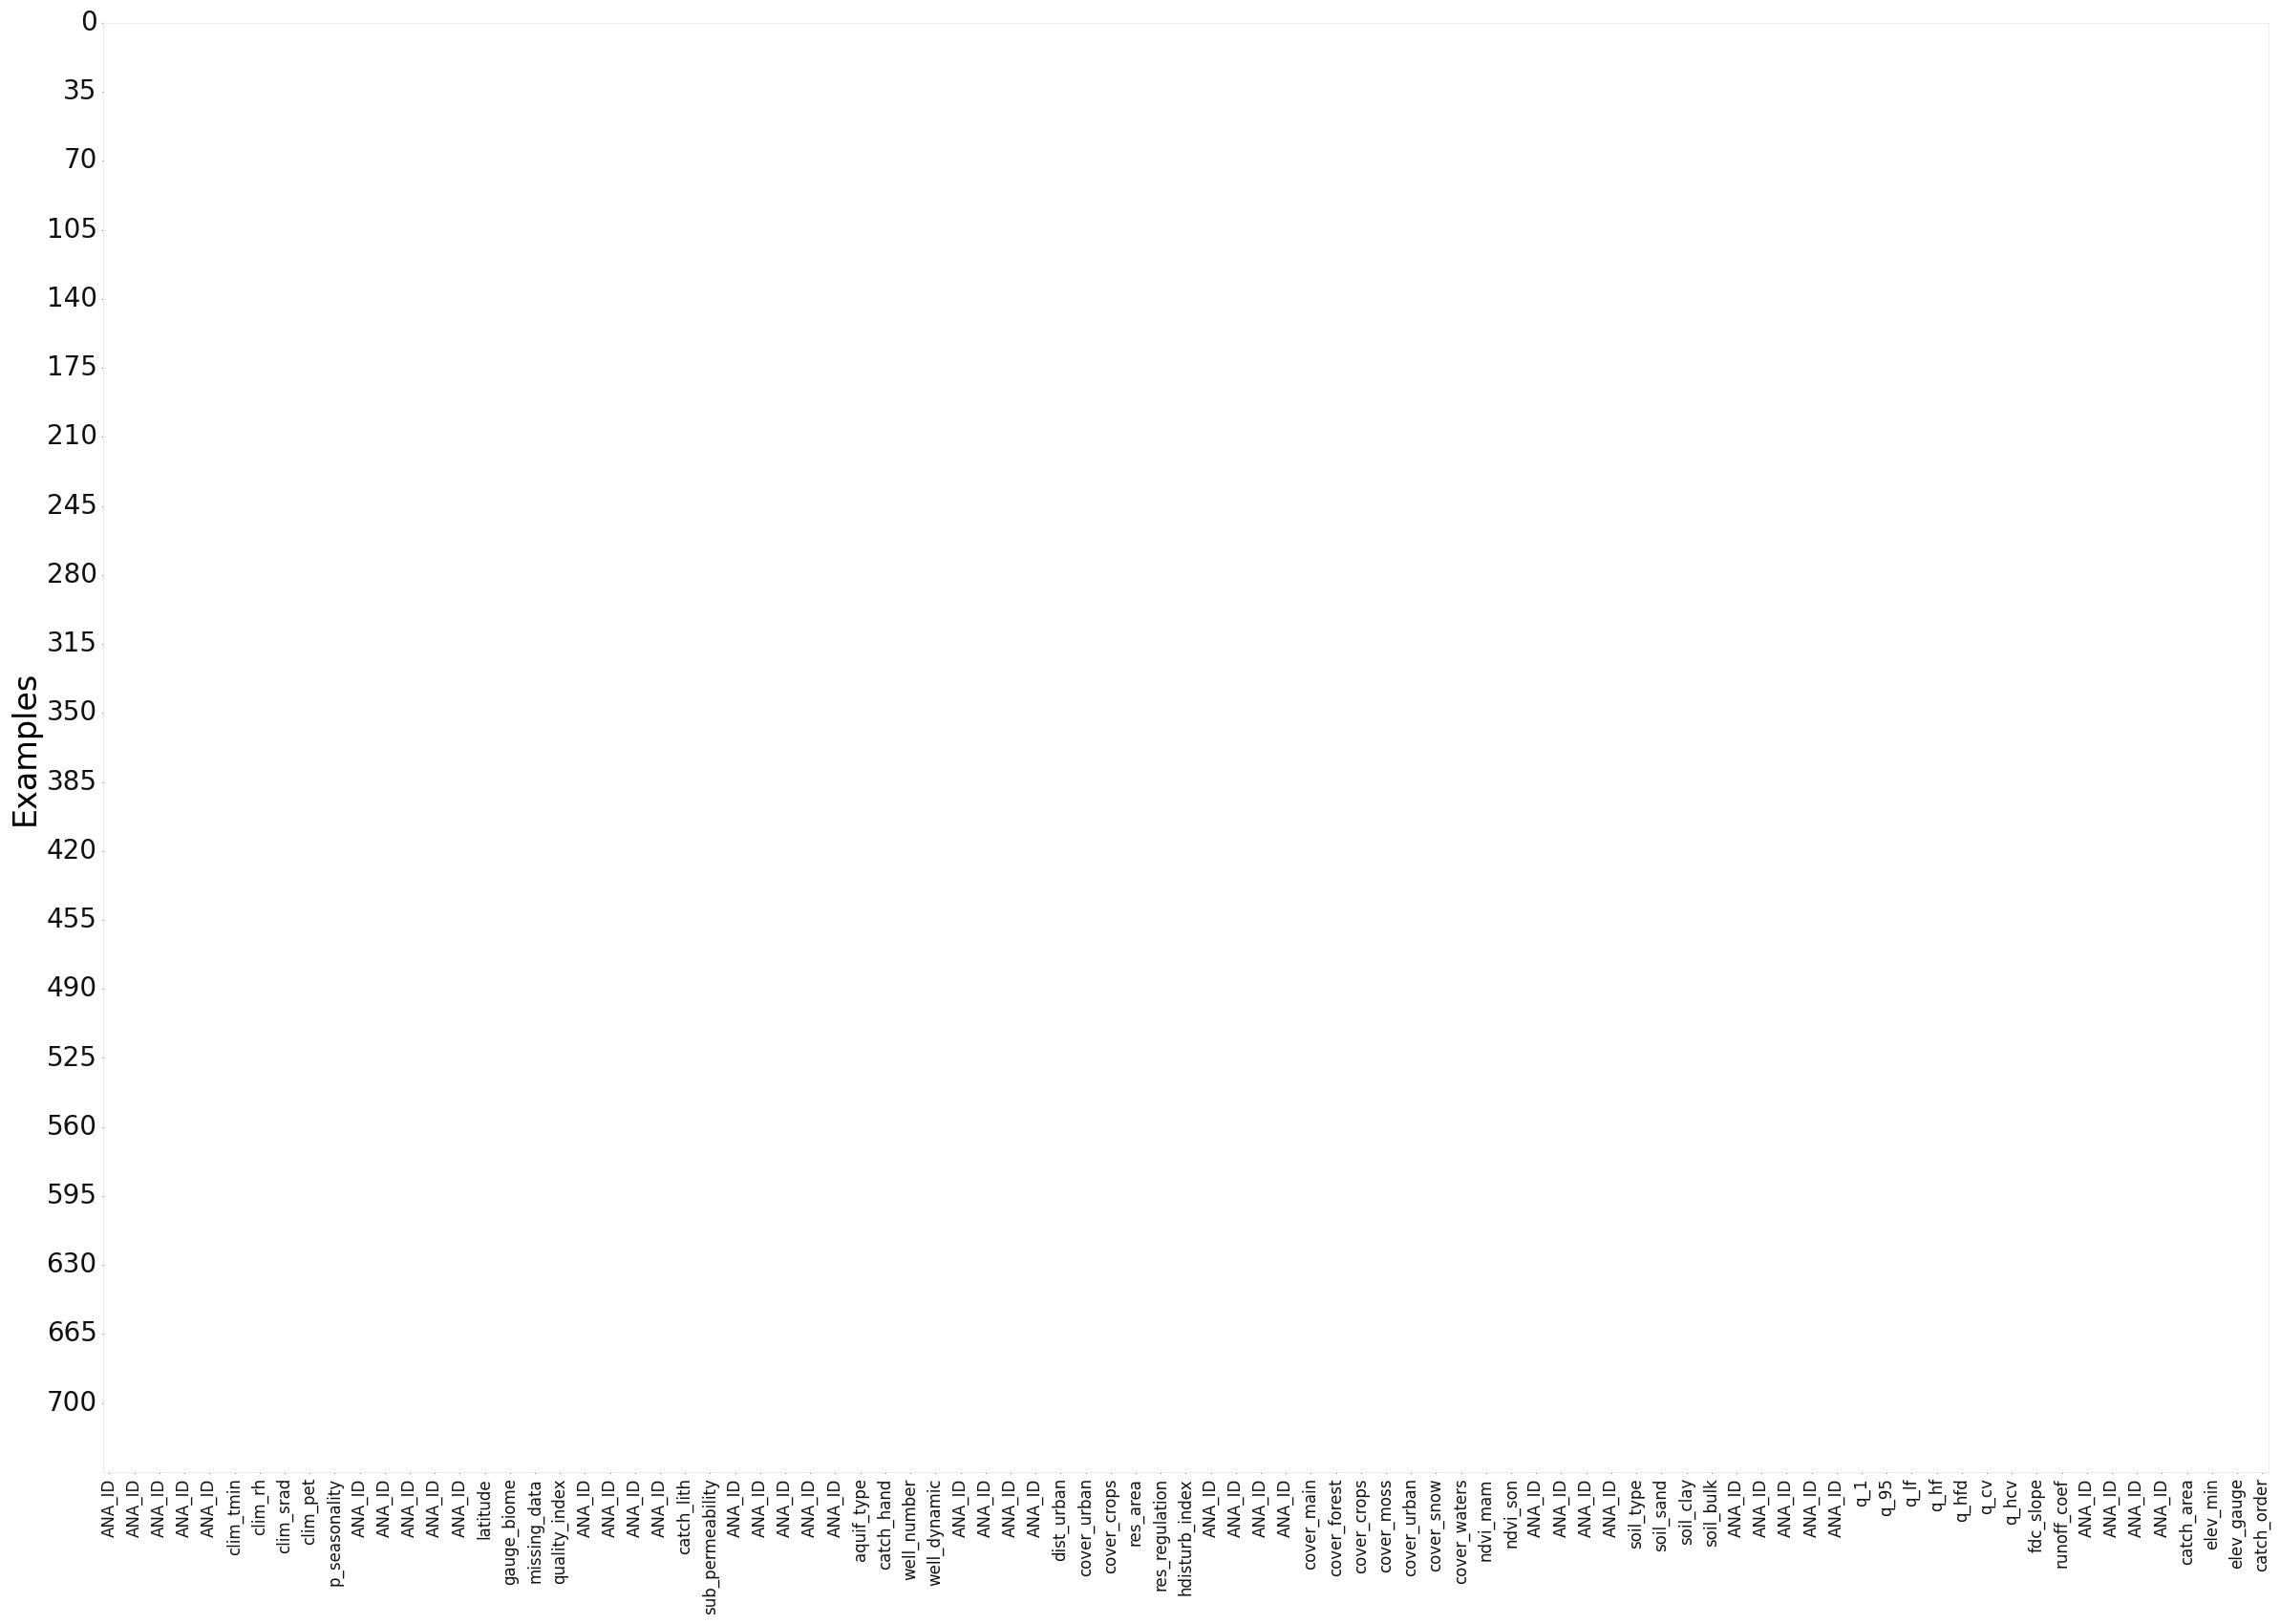

<AxesSubplot: ylabel='Examples'>

In [9]:
EDA(data=static, save=False).heatmap()

In [12]:
physical_features = []
soil_features = []
geological_features = []
flow_characteristics = []

In [10]:
static = static.dropna(axis=1)
static.shape

(735, 97)

In [12]:
coords = dataset.stn_coords()
coords

lat       long
CABra_ID                      
1         -6.541000 -64.384003
2          1.215000 -66.850998
3          1.074000 -67.595001
4          0.372000 -67.313004
5          0.477000 -69.125999
...             ...        ...
731      -24.486000 -47.838001
732      -28.941999 -49.602001
733      -29.337000 -51.188000
734      -29.966000 -50.978001
735      -29.962999 -51.068001

[735 rows x 2 columns]

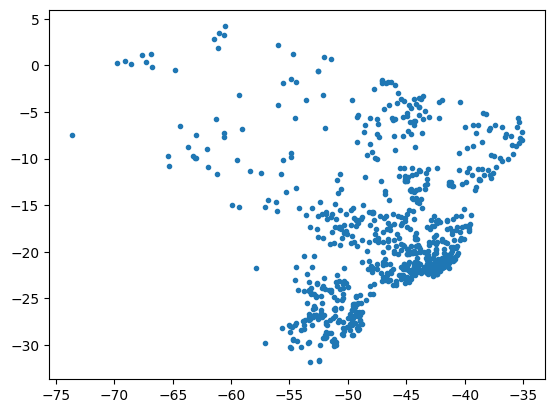

<AxesSubplot: >

In [14]:
dataset.plot_stations()

In [15]:
lat = coords['lat'].astype(float).values.reshape(-1,)
long = coords['long'].astype(float).values.reshape(-1,)

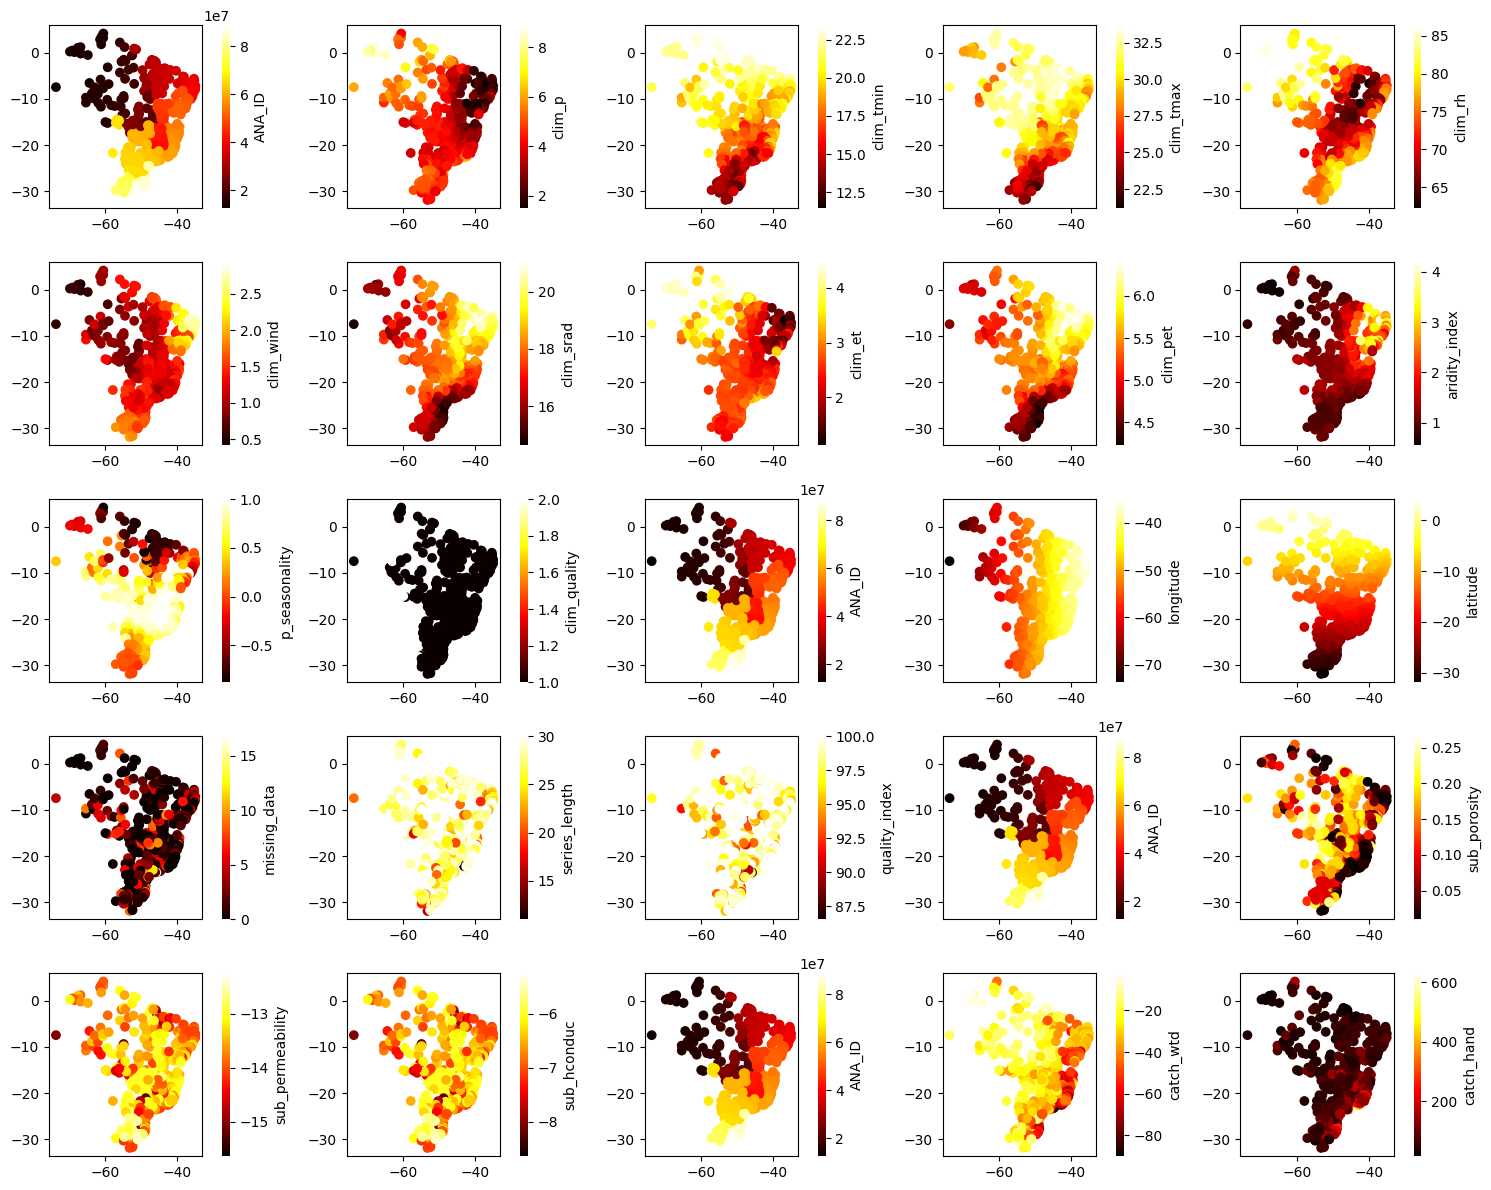

31


In [16]:
idx = 0
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25 and idx<static.shape[1]:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = static.shape[0]
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue

plt.tight_layout()
plt.show()
print(idx)

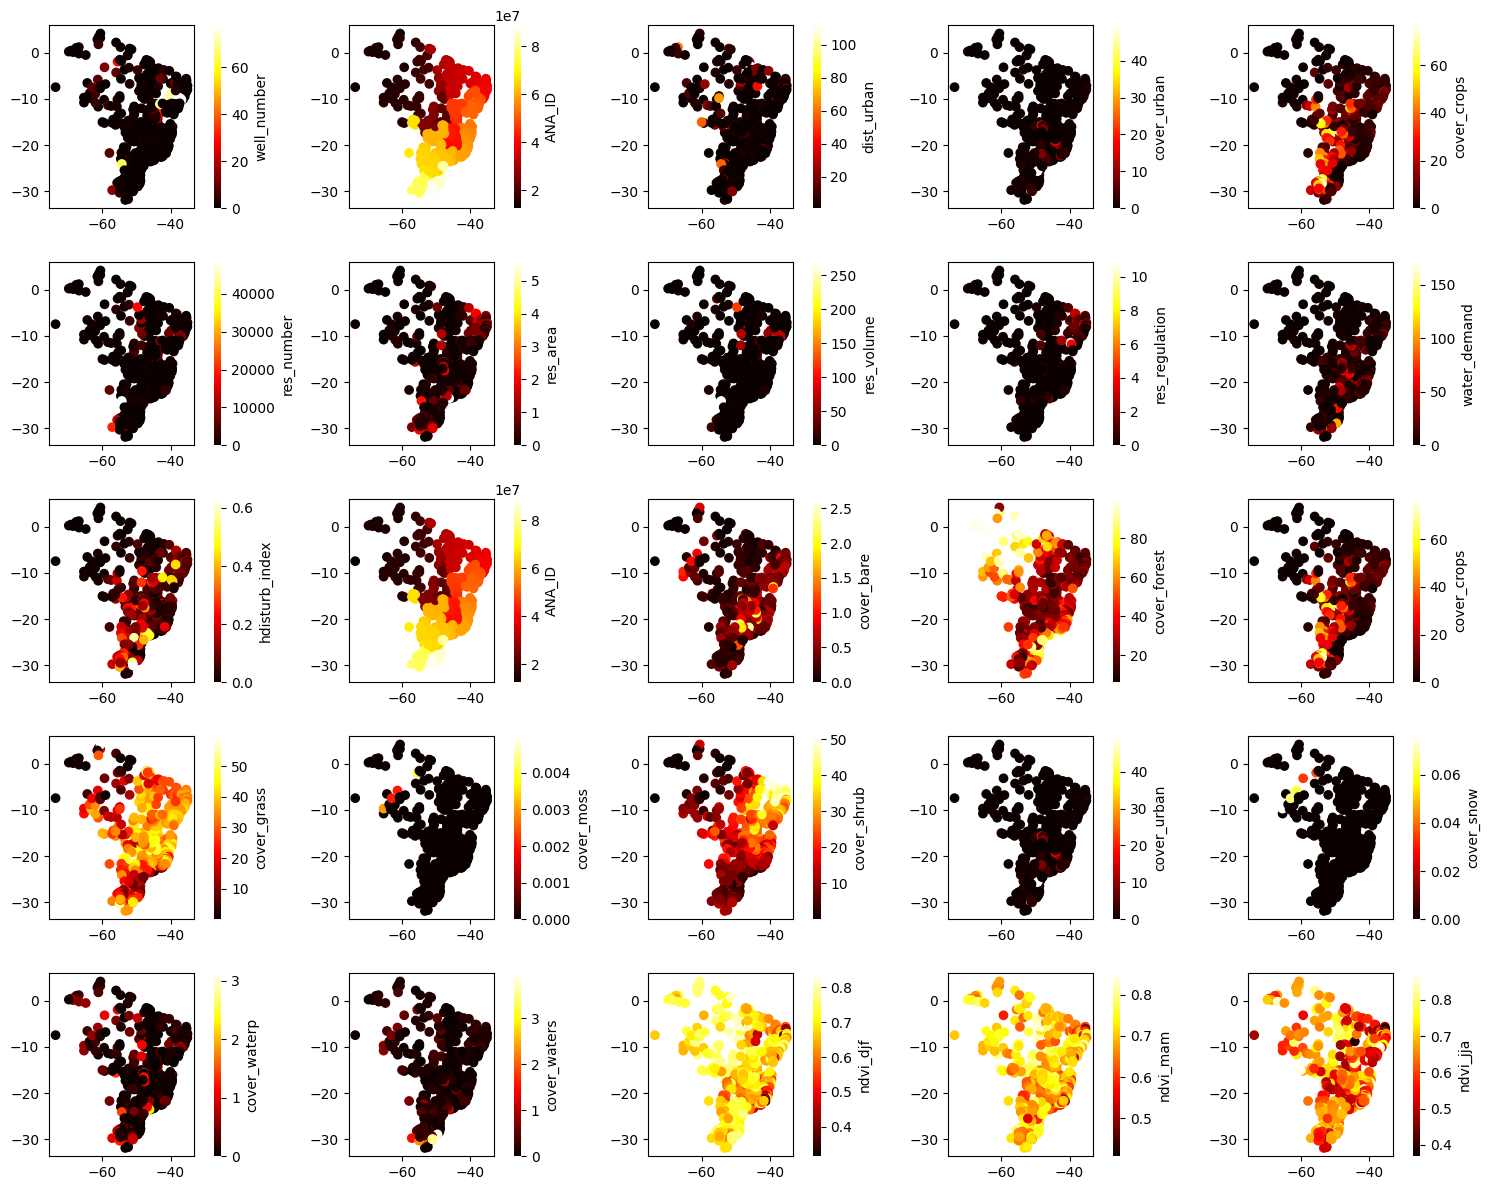

60


In [17]:
idx = 31
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25 and idx<static.shape[1]:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = static.shape[0]
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue

plt.tight_layout()
plt.show()
print(idx)

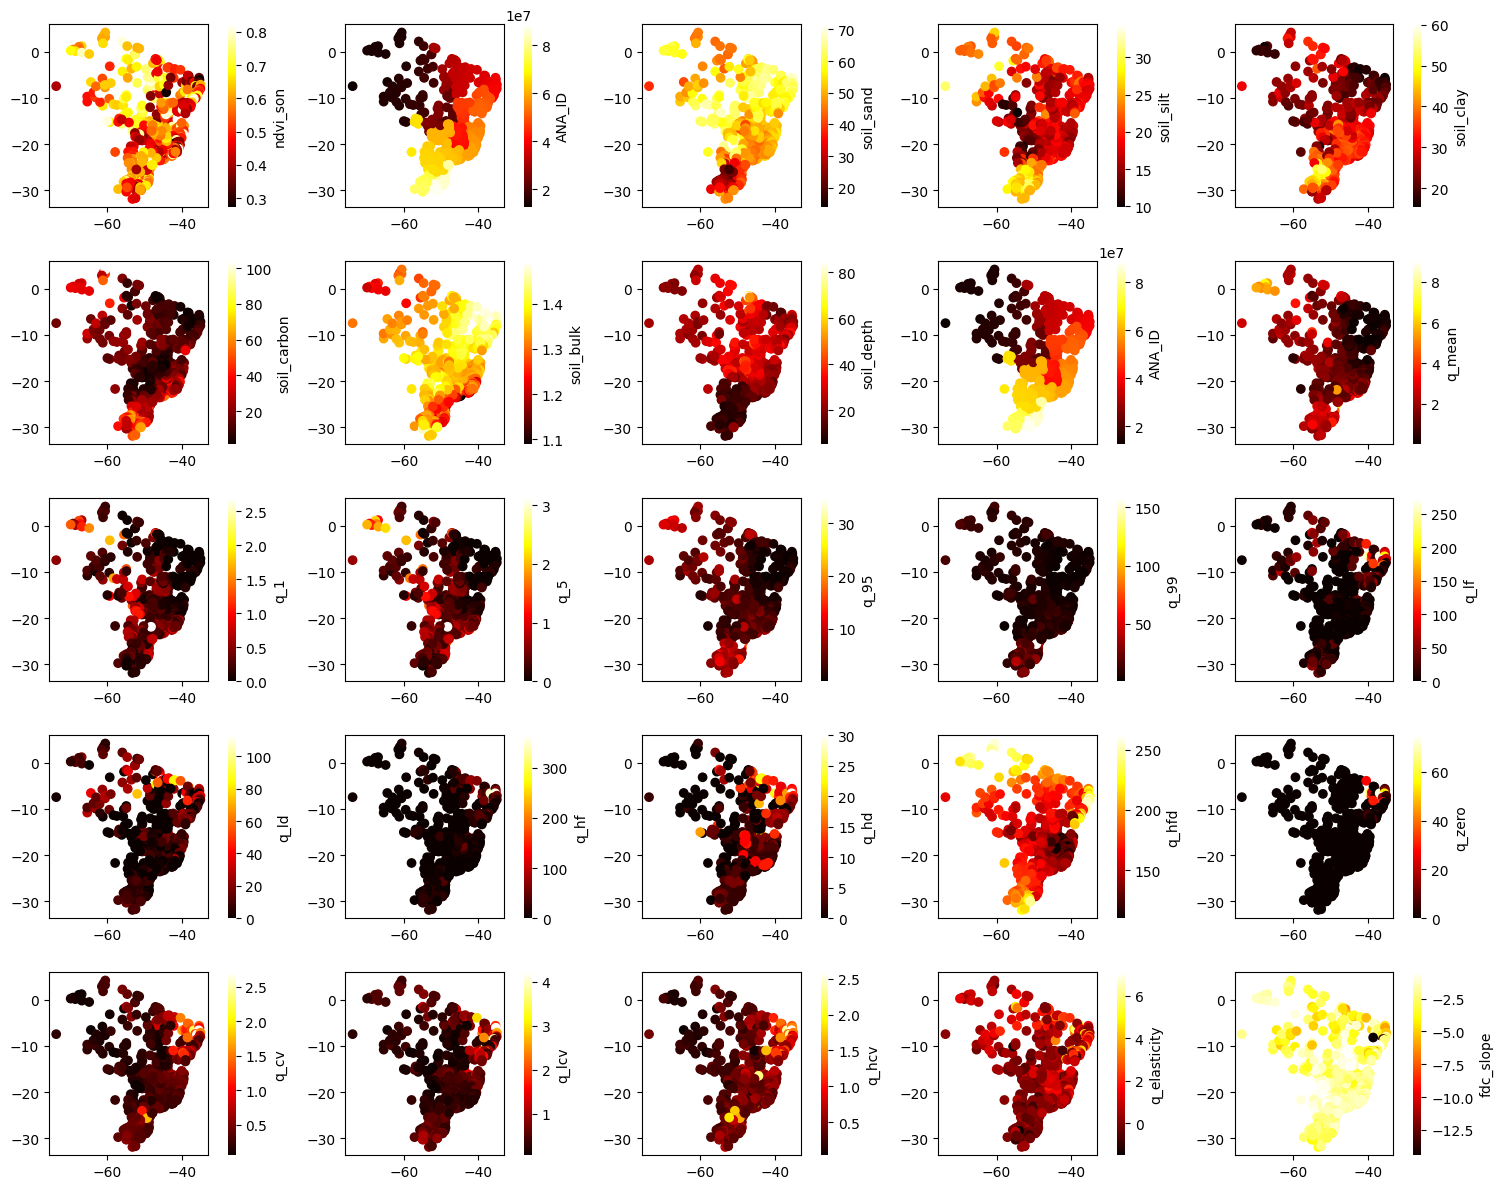

87


In [18]:
idx = 60
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25 and idx<static.shape[1]:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = static.shape[0]
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue

plt.tight_layout()
plt.show()
print(idx)

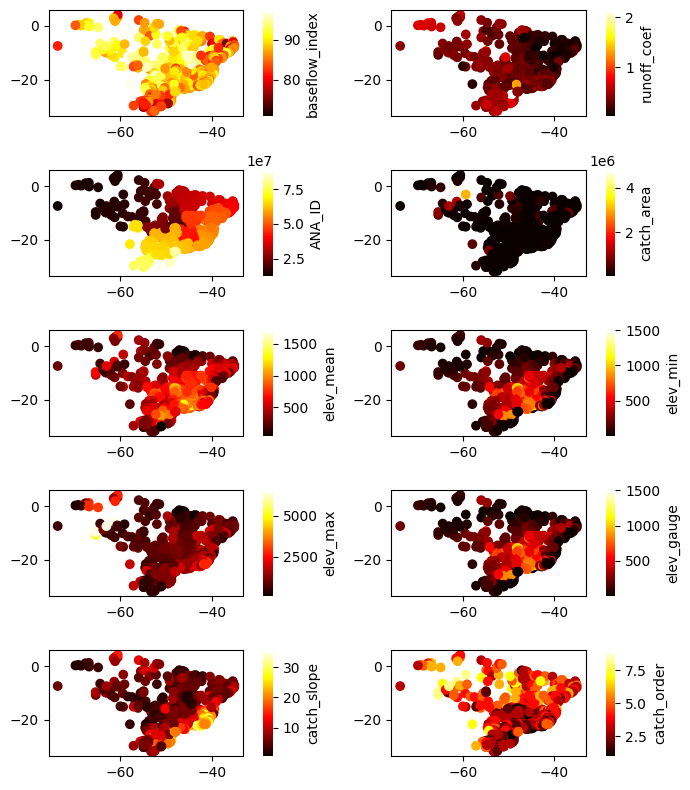

97


In [24]:
idx = 87
ax_num = 0

fig, axes = plt.subplots(5, 2, figsize=(7, 8))
axes = axes.flatten()

while ax_num < 25 and idx<static.shape[1]:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = static.shape[0]
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue

plt.tight_layout()
plt.show()
print(idx)

### Dynamic Features

In [25]:
dataset.dynamic_features

['p_ens',
 'tmin_ens',
 'tmax_ens',
 'rh_ens',
 'wnd_ens',
 'srad_ens',
 'et_ens',
 'pet_pm',
 'pet_pt',
 'pet_hg',
 'Quality',
 'Streamflow']

#### Streamflow

In [27]:
streamflow = dataset.q_mmd()
streamflow.shape

(10956, 735)

In [28]:
EDA(data=streamflow, save=False).heatmap()

<AxesSubplot: ylabel='Examples'>

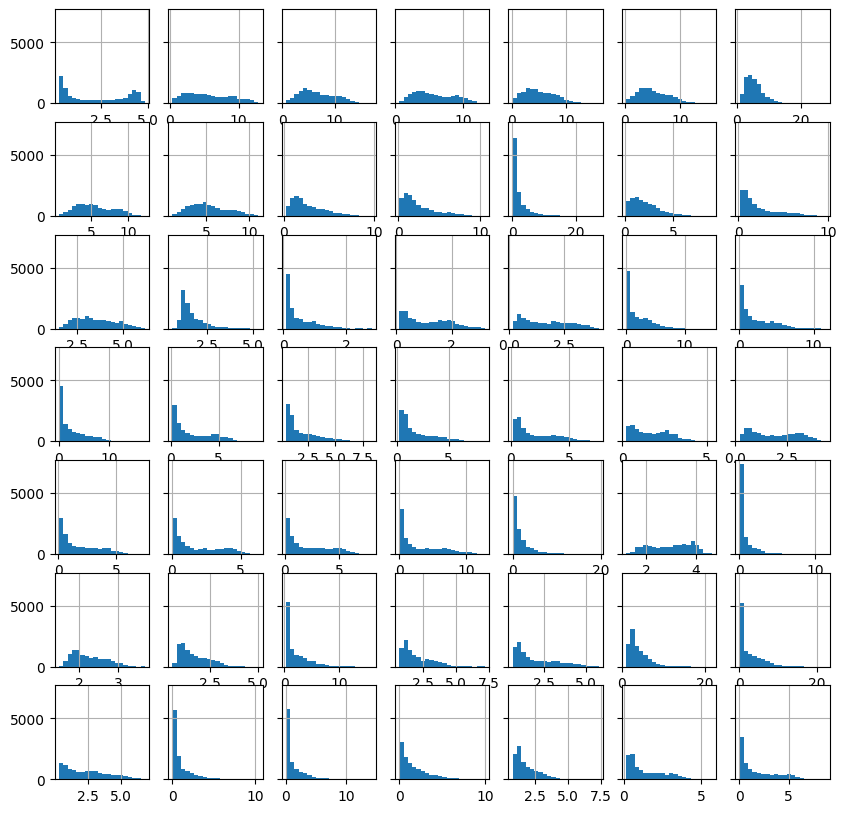

49


In [29]:
st = 0

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    
    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

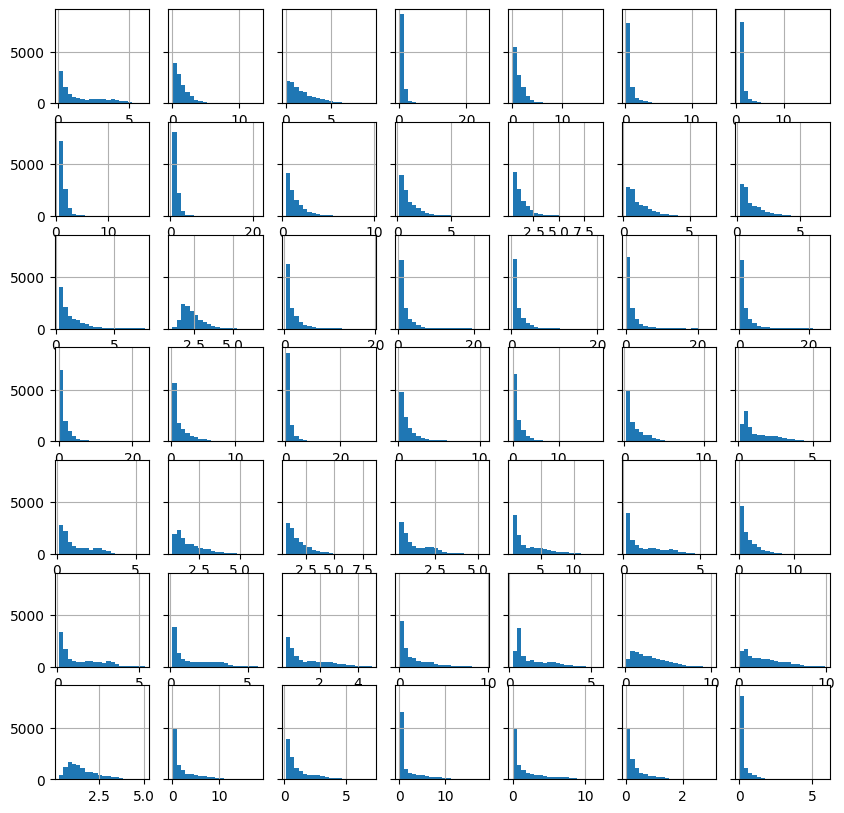

98


In [30]:
st = 49

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    
    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

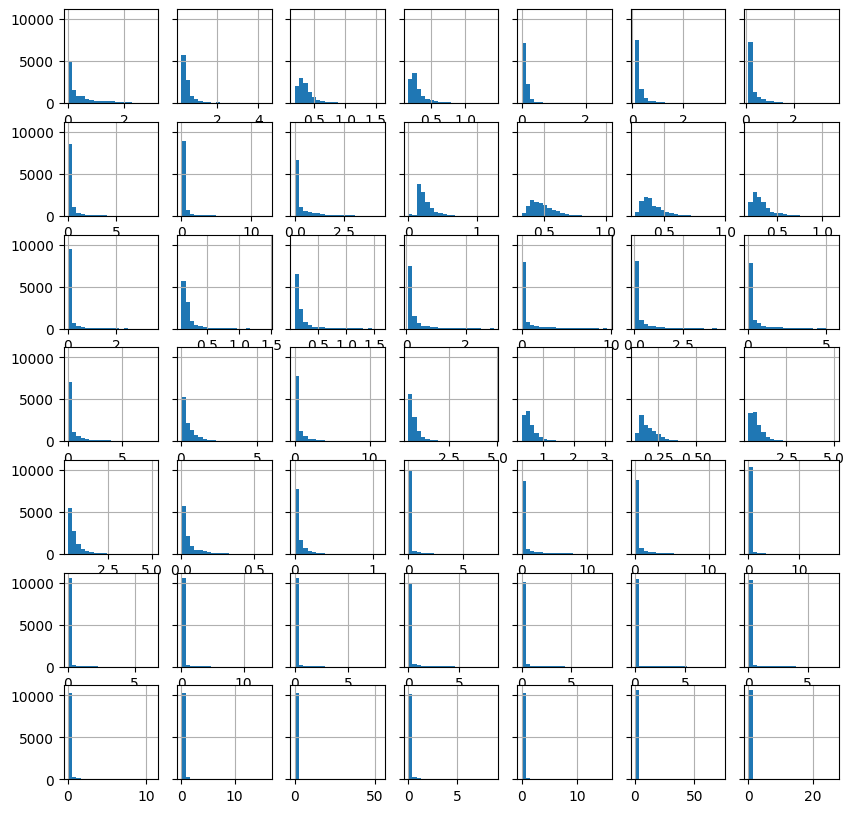

147


In [31]:
st = 98

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

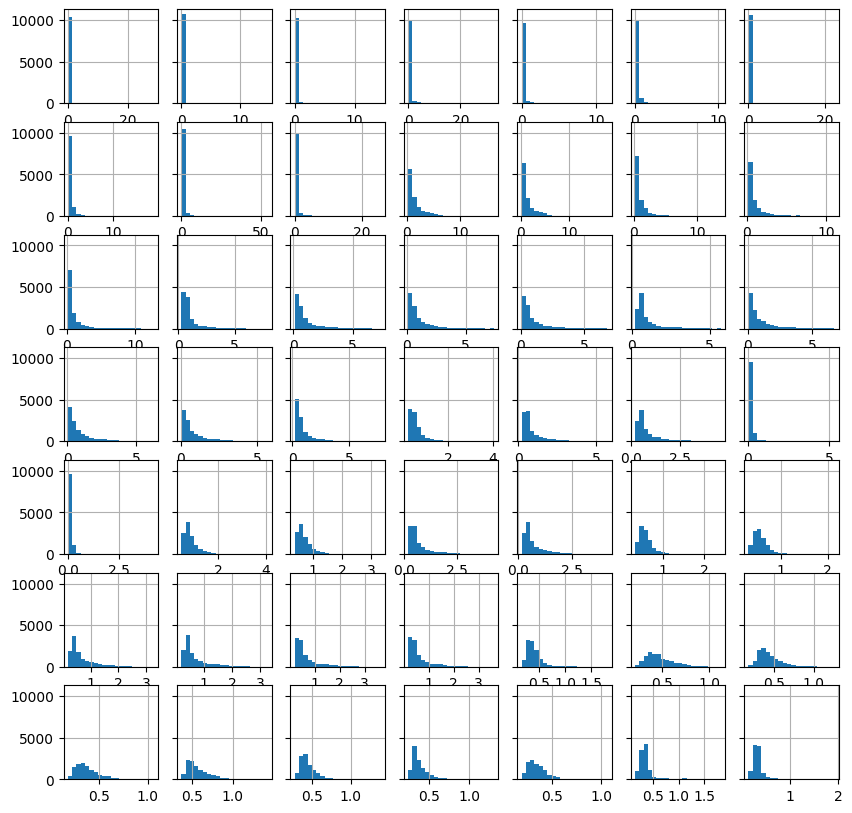

196


In [32]:
st = 147

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

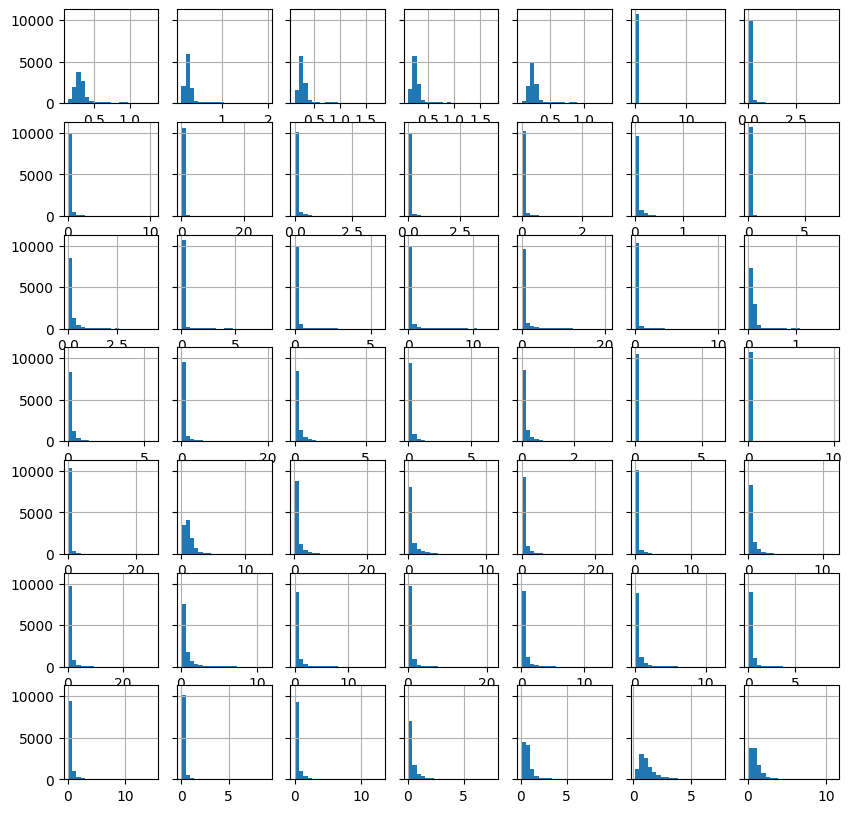

245


In [33]:
st = 196

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

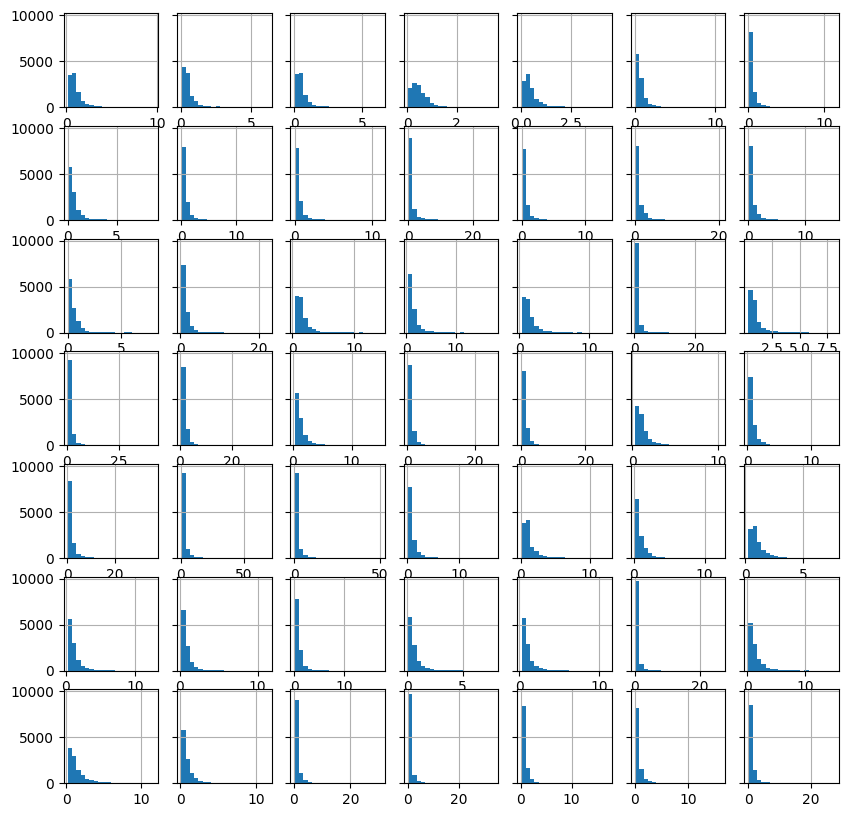

294


In [34]:
st = 245

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

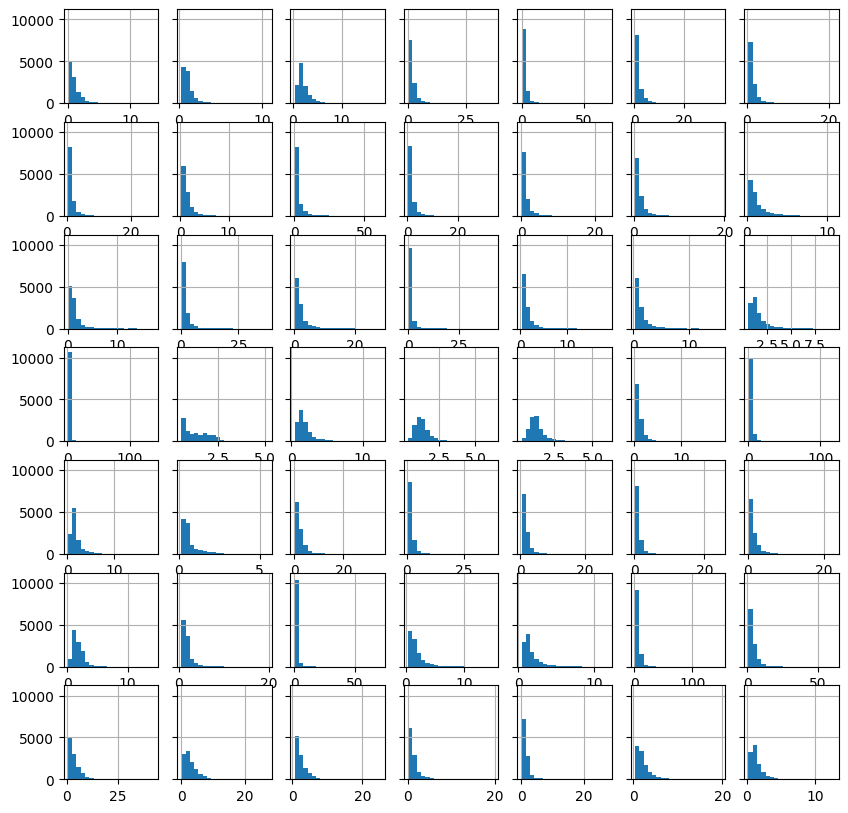

343


In [35]:
st = 294

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

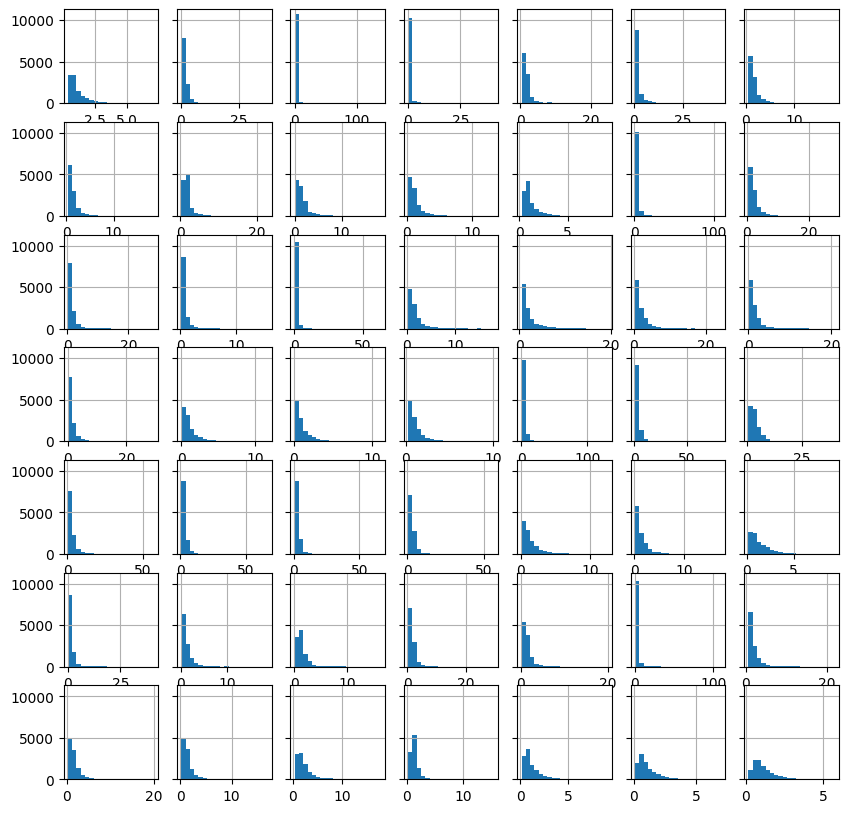

392


In [36]:
st = 343

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

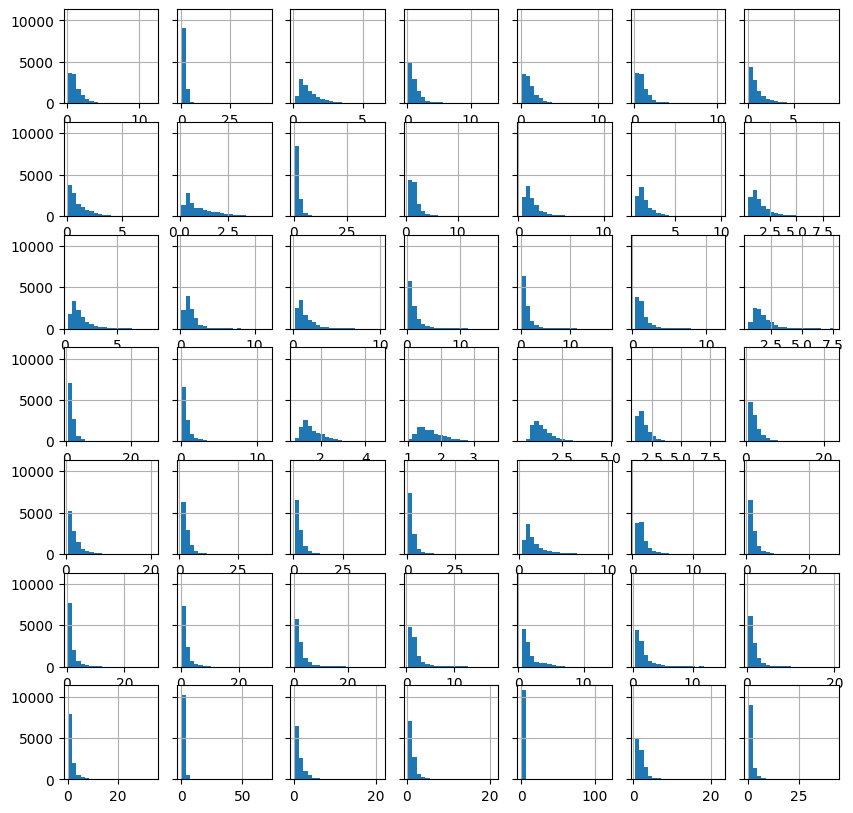

441


In [37]:
st = 392

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

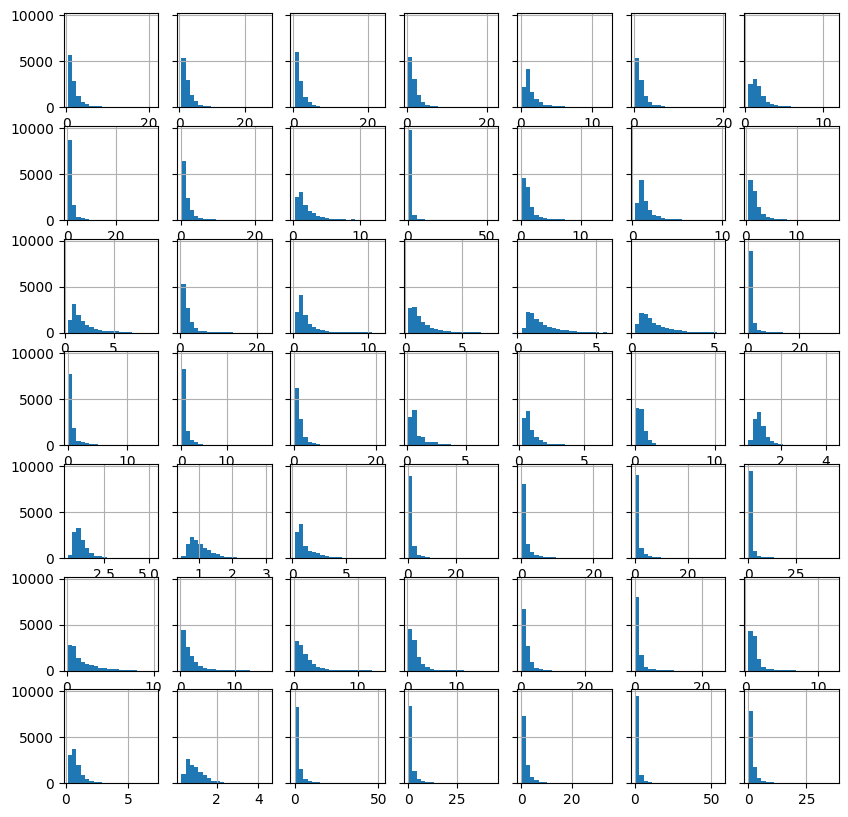

490


In [38]:
st = 441

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

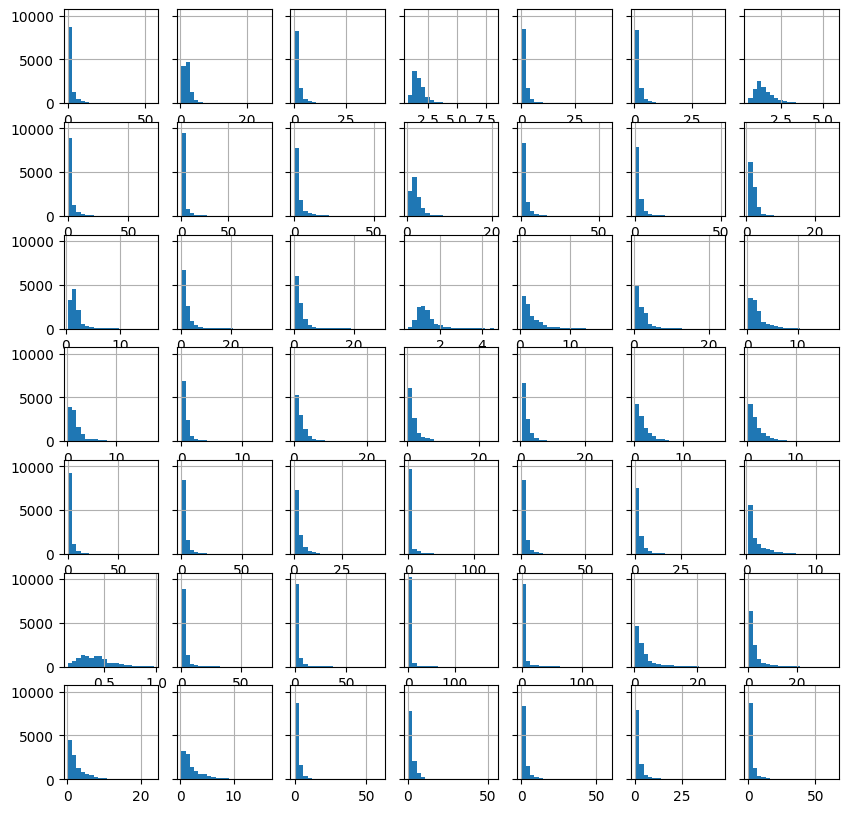

539


In [39]:
st = 490

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

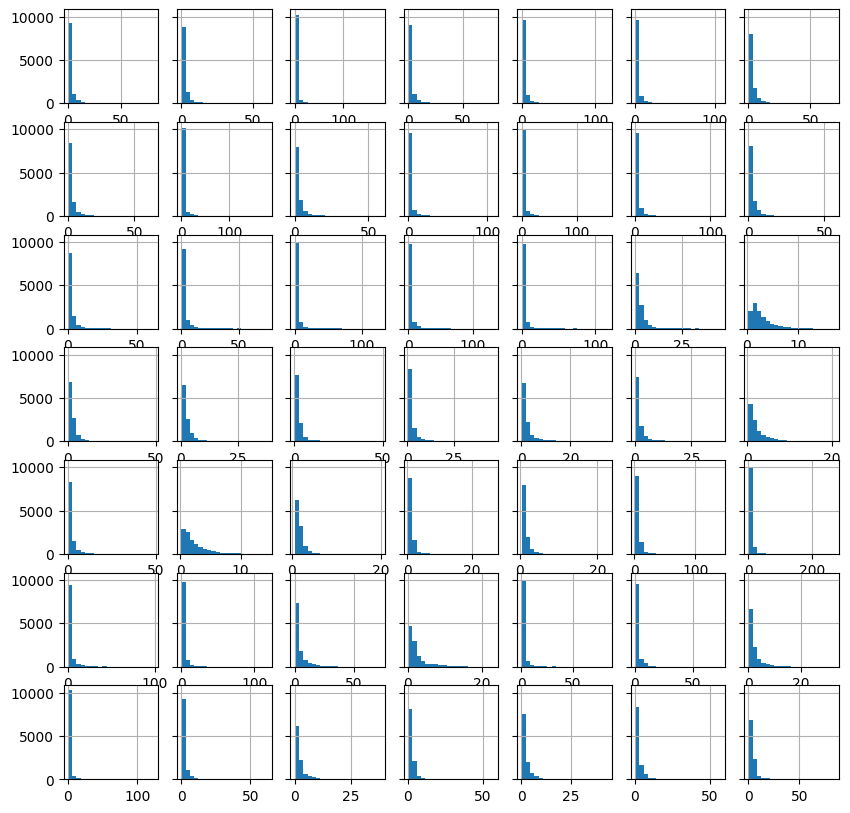

588


In [40]:
st = 539

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

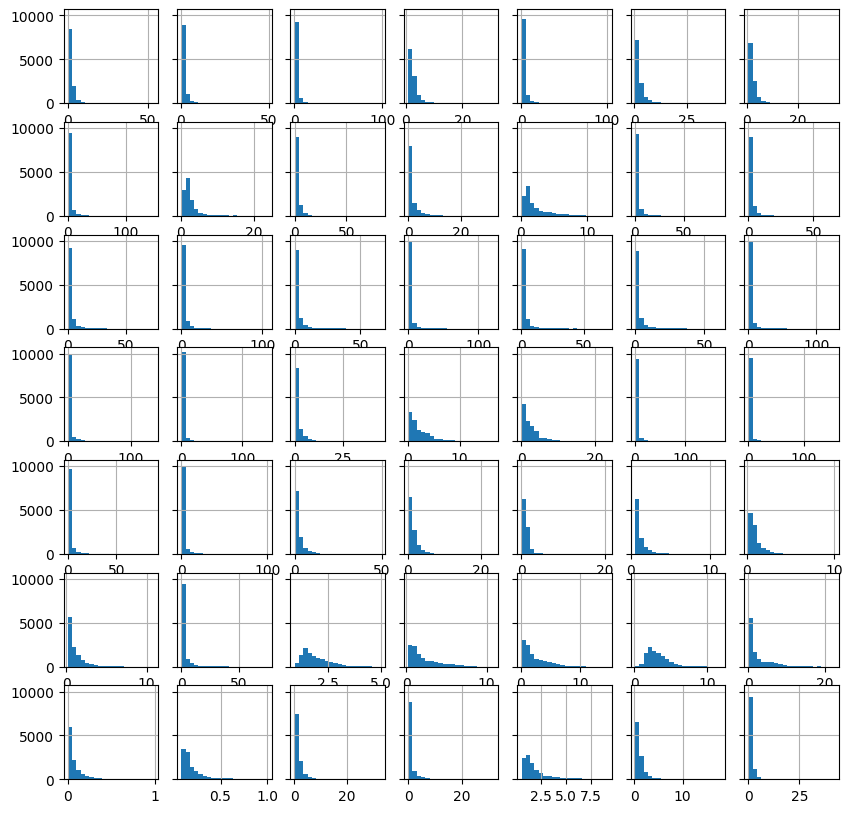

637


In [41]:
st = 588

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

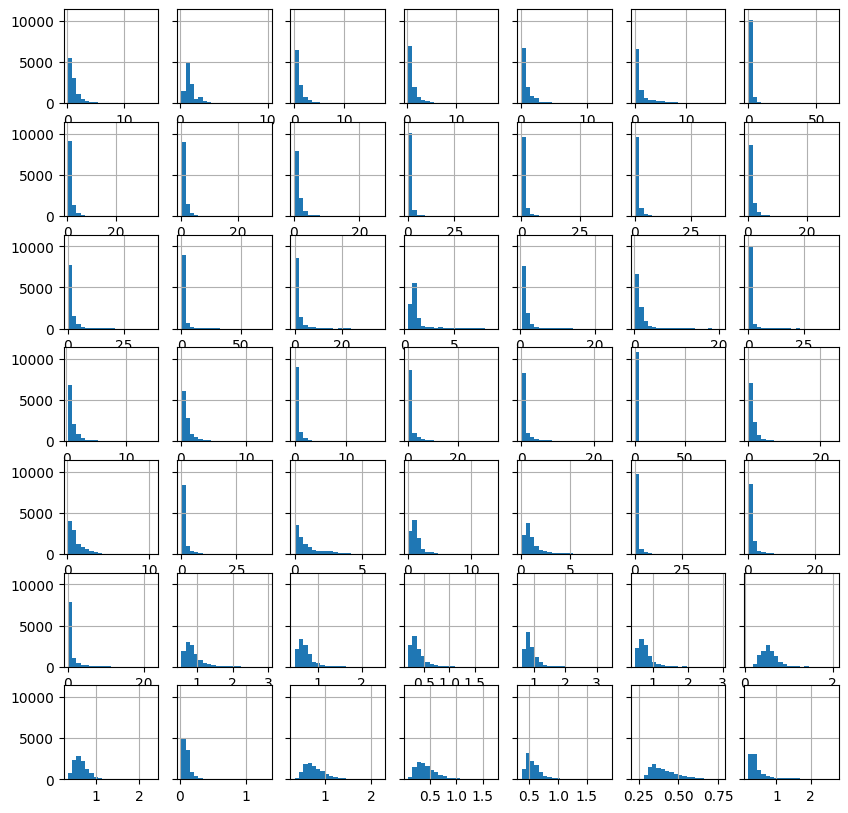

686


In [42]:
st = 637

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

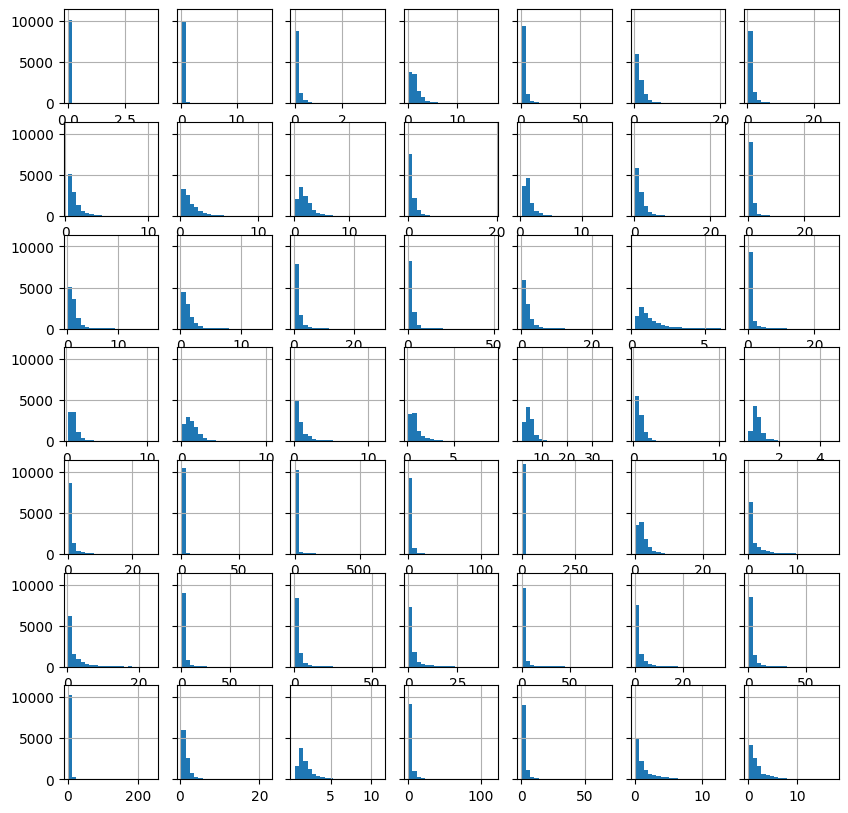

735


In [43]:
st = 686

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

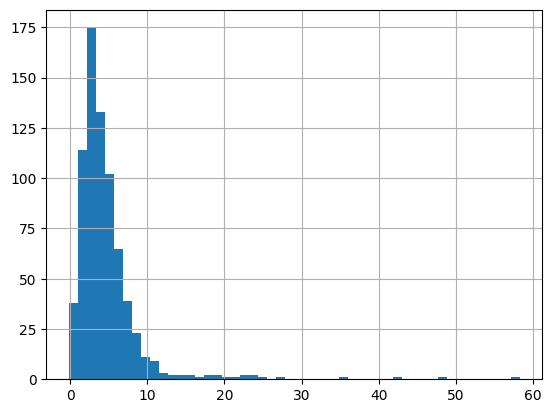

In [44]:
# skewness of streamflow

_ = hist(streamflow.skew().values.reshape(-1,), bins=50)

#### Potential evapotranspiration

In [40]:
pet = dataset.fetch(dynamic_features = 'pet_pm', as_dataframe=True)
pet = pet.reset_index()
pet.index = pd.to_datetime(pet.pop('time'))
pet.pop('dynamic_features')
print(pet.shape) 
EDA(data=pet, save=False).heatmap()

(10956, 735)


<Axes: ylabel='Examples'>

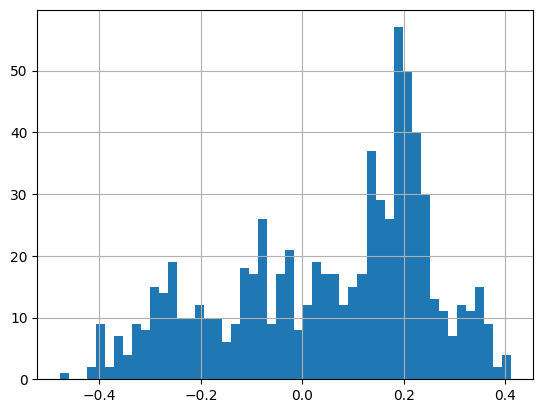

In [41]:
_ = hist(pet.skew().values.reshape(-1,), bins=50)

#### Air Temperature

In [45]:
tmax = dataset.fetch(dynamic_features = 'tmax_ens', as_dataframe=True)
tmax = tmax.reset_index()
tmax.index = pd.to_datetime(tmax.pop('time'))
tmax.pop('dynamic_features')
print(tmax.shape)

tmin = dataset.fetch(dynamic_features = 'tmin_ens', as_dataframe=True)
tmin = tmin.reset_index()
tmin.index = pd.to_datetime(tmin_SILO.pop('time'))
tmin.pop('dynamic_features')
print(tmin.shape)

tavg = np.mean([tmax.values, tmin.values], axis=0)
print(tavg.shape)

tavg = pd.DataFrame(tavg, index = tmin.index, columns=tmin.columns.tolist())
print(tavg.shape)

EDA(data=tavg, save=False).heatmap()

(10956, 735)
(10956, 735)
(10956, 735)
(10956, 735)


<Axes: ylabel='Examples'>

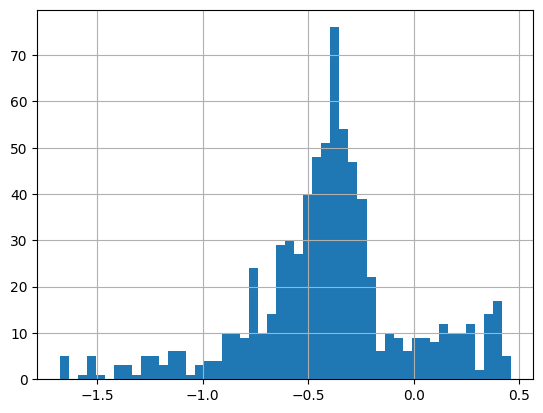

In [47]:

_ = hist(tavg.skew().values.reshape(-1,), bins=50)

#### Precipitation


In [43]:
pcp = dataset.fetch(dynamic_features = 'p_ens', as_dataframe=True)
pcp = pcp.reset_index()
pcp.index = pd.to_datetime(pcp.pop('time'))
pcp.pop('dynamic_features')
print(pcp.shape) 
EDA(data=pcp, save=False).heatmap()

(10956, 735)


<Axes: ylabel='Examples'>

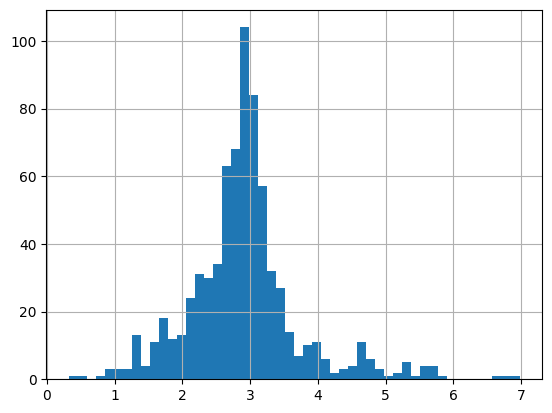

In [44]:
_ = hist(pcp.skew().values.reshape(-1,), bins=50)